In [1]:
from manim import *
import math
import numpy as np
from manim_slides import *

/Users/mnica/py_projects/.venv/lib/python3.9/site-packages/pydub/utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)
/Users/mnica/py_projects/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
import os
os.environ["PATH"] = "/Library/TeX/texbin:" + os.environ["PATH"]

In [3]:
## Global Variables and Stuff ##
#config.media_embed = True
DELAY = 0.1

# latex preamble
texPre = TexTemplate()
texPre.add_to_preamble(r"""
    \usepackage{amsmath}
    \usepackage{amssymb}
    \newcommand{\E}{\mathbb{E}}
    \newcommand{\P}{\mathbb{P}}
    \newcommand{\vect}[1]{\mathbf{#1}}
""") 

# tex color dictionary
E_color = GREY_B
n_color = BLUE_C
T_color = ORANGE
F_color = PURPLE_A
k_color = GREEN
x_color = TEAL
f_color = r"#FFB347"
t2cD = {
    r"\mathbb{E}": E_color,
    r"\mathbb{P}": E_color,
    r"\big(": E_color,
    r"\big)": E_color,
    "n ": n_color,
    "T ": T_color,
    "F_": F_color,
    "k ": k_color,
    "x ": x_color,
    "x{}": x_color,
    "1{}": x_color,
    " f" : f_color
}

# font sizes
my_fs = 75

#other colors

house_color = WHITE
dot_color = WHITE
edge_color = BLUE

Manim Community v0.19.0

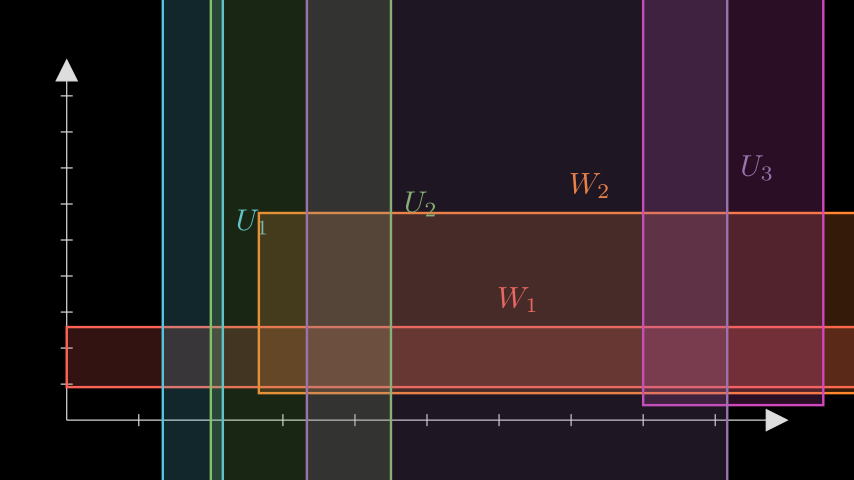

In [6]:
%%manim -ql -v WARNING WeedsUpperHandScene

class WeedsUpperHandScene(Scene):
    def construct(self):
        axes = Axes(
            x_range=[0, 20, 2],
            y_range=[0, 20, 2],
            axis_config={"color": GREY_A}
        )
        labels = axes.get_axis_labels(x_label="n", y_label="m")
        self.add(axes)
        #self.play(Create(axes), Write(labels))

        rects = VGroup()

        colors_W = [RED, ORANGE, PINK]
        colors_U = [BLUE, GREEN, PURPLE]

        for k in range(1, 4):
            # ---- W_{k,P1}: n >= 2^{k+1}+1, 2^k+1 <= m <= 2^{k+1}
            x0 = 2**(k+1) + 1
            x1 = 20  # truncate for visualization
            y0 = 2**k + 1
            y1 = 2**(k+1)
            rect_W = Rectangle(
                width=(x1 - x0),
                height=(y1 - y0),
                stroke_color=colors_W[k-1],
                fill_color=colors_W[k-1],
                fill_opacity=0.2
            ).move_to(axes.c2p((x0 + x1)/2, (y0 + y1)/2))
            label_W = MathTex(f"W_{{{k}}}").next_to(rect_W, UP).set_color(colors_W[k-1])
            rects.add(rect_W, label_W)

            # ---- U_{k,P1}: 2^k+1 <= n <= 2^{k+1}, m >= 2^k
            x0 = 2**k + 1
            x1 = 2**(k+1)
            y0 = 2**k
            y1 = 20  # truncate
            rect_U = Rectangle(
                width=(x1 - x0),
                height=(y1 - y0),
                stroke_color=colors_U[k-1],
                fill_color=colors_U[k-1],
                fill_opacity=0.2
            ).move_to(axes.c2p((x0 + x1)/2, (y0 + y1)/2))
            label_U = MathTex(f"U_{{{k}}}").next_to(rect_U, RIGHT).set_color(colors_U[k-1])
            rects.add(rect_U, label_U)
        self.add(rects)
        #self.play(*[FadeIn(r) for r in rects])
        #self.wait()


In [6]:
%%manim -ql -v WARNING RadonDecayScene
from manim import *
import random

class RadonDecayScene(Scene):
    def create_rn_particle(self, position: np.ndarray) -> VGroup:
        """Create an Rn particle (circle with 'Rn' label)"""
        circle = Circle(radius=0.3, color=BLUE, fill_opacity=0.5).move_to(position)
        label = Text("Rn", font_size=24).move_to(position)
        rn = VGroup(circle, label)
        return rn

    def create_po_particle(self, position: np.ndarray) -> VGroup:
        """Create a Po particle (circle with 'Po' label)"""
        circle = Circle(radius=0.3, color=GREEN, fill_opacity=0.5).move_to(position)
        label = Text("Po", font_size=24).move_to(position)
        po = VGroup(circle, label)
        return po

    def create_alpha_particle(self, start_pos: np.ndarray, direction: np.ndarray = RIGHT) -> VGroup:
        """Create a fast-moving alpha particle (small red dot with 'α' label)"""
        alpha_dot = Dot(color=RED).scale(0.5).move_to(start_pos)
        alpha_label = Text("α", font_size=20, color=RED).next_to(alpha_dot, direction, buff=0.1)
        alpha = VGroup(alpha_dot, alpha_label)
        return alpha

    def random_direction(self) -> np.ndarray:
        """Generate a random 2D unit vector"""
        angle = random.uniform(0, 2 * PI)
        return np.array([np.cos(angle), np.sin(angle), 0])

    def floating_animation(self, particles: list):
        """Return a list of floating animations with linear rate function"""
        animations = []
        for p in particles:
            direction = self.random_direction() * random.uniform(0.1, 0.3)
            animations.append(
                p.animate.shift(direction).set_run_time(random.uniform(1.5, 3)).set_rate_func(linear)
            )
        return animations

    def decay_animation(self, rn: VGroup) -> list:
        """Return a list of animations to decay one Rn -> Po + alpha particle"""
        position = rn.get_center()
        po = self.create_po_particle(position)
        alpha = self.create_alpha_particle(position)
        alpha_dir = self.random_direction()

        self.add(alpha)  # Make alpha visible immediately

        return [
            Transform(rn, po, rate_func=linear, run_time=1),
            alpha.animate.shift(alpha_dir * 3).set_run_time(1).set_rate_func(linear),
            FadeOut(alpha, rate_func=linear).set_run_time(0.1)
        ]

    def construct(self):
        # Create multiple Rn particles in random positions
        rn_particles = []
        for _ in range(10):
            pos = np.array([
                random.uniform(-5, 5),
                random.uniform(-3, 3),
                0
            ])
            rn = self.create_rn_particle(pos)
            rn_particles.append(rn)
            self.add(rn)

        # Animate multiple frames
        for _ in range(20):
            anims = []

            # Floating animations
            anims += self.floating_animation(rn_particles)

            # Random decay event
            if random.random() < 0.4:
                target_index = random.randint(0, len(rn_particles) - 1)
                target_rn = rn_particles[target_index]
                anims += self.decay_animation(target_rn)

            # Play all animations simultaneously
            self.play(*anims, run_time=1)


Manim Community v0.19.0